# 阶段二：寻找函数

## 用最小二乘法拟合一个函数

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot

In [2]:
# 我们用来生成拟合数据的基准函数依然是 y = 1.2 * x * x - 3.7 * x + 4.9
a_ground_truth = np.double(1.2)
b_ground_truth = np.double(-3.7)
c_ground_truth = np.double(4.9)

target_func = lambda x: a_ground_truth * x * x + b_ground_truth * x + c_ground_truth

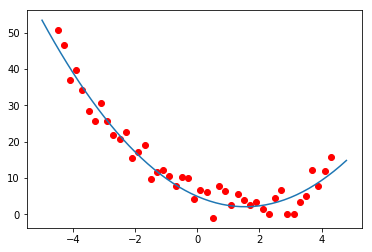

In [3]:
# 生成拟合数据的时候，我们引入了噪音：10.0 * (np.double(np.random.rand()) - 0.5)
points_x = np.arange(-4.5, 4.5, 0.2).astype(np.float64)
points_y = [target_func(x) + 10.0 * (np.double(np.random.rand()) - 0.5) for x in points_x]

# 将基准函数和拟合数据画出来
pts_x_ground_truth = np.arange(-5.0, 5.0, 0.2).astype(np.float64)
pts_y_ground_truth = [target_func(x) for x in pts_x_ground_truth]

plot(points_x, points_y, 'ro')
plot(pts_x_ground_truth, pts_y_ground_truth)

In [4]:
import sympy as sp

In [5]:
a = sp.Symbol('a')
b = sp.Symbol('b')
c = sp.Symbol('c')

In [6]:
# 依然假设需要拟合的函数符合这样一个形式： y = a * x * x + b * x + c
hypo_func = lambda x: a * x * x + b * x + c

In [7]:
# 定义如何衡量 通过拟合函数预测出来的值 和 真实数据值 之间的差距：差的平方
distance_func = lambda x,y: (y - hypo_func(x))**2

In [8]:
# 将上面的衡量标准应用到所有的点
loss_func = lambda pts_x, pts_y: sum([distance_func(x,y) for x, y in zip(pts_x, pts_y)])

In [9]:
# 得到整个拟合数据在拟合函数上的的表现
loss = loss_func(points_x, points_y)
loss = sp.simplify(loss)

loss

3702.71010000001*a**2 - 182.249999999993*a*b + 608.100000000001*a*c - 12767.7419690603*a + 304.05*b**2 - 8.99999999999965*b*c + 2499.00596498215*b + 45.0*c**2 - 1245.94157282206*c + 15925.8460799598

In [10]:
# 上面那个 loss 最小的时候，就是导数为零的时候： d(loss)/d(a,b,c) = 0 
print(
    '\n'.join([ f"{sp.diff(loss, var)} = 0" for var in [a,b,c] ])
)

7405.42020000003*a - 182.249999999993*b + 608.100000000001*c - 12767.7419690603 = 0
-182.249999999993*a + 608.100000000001*b - 8.99999999999965*c + 2499.00596498215 = 0
608.100000000001*a - 8.99999999999965*b + 90.0*c - 1245.94157282206 = 0


In [11]:
# 又得到了一组三元一次方程组，依然用矩阵法求解
mat_a = [sp.Poly(sp.diff(loss, var)).coeffs()[:-1] for var in [a,b,c]]
mat_b = [sp.Poly(-sp.diff(loss, var)).coeffs()[-1] for var in [a,b,c]]

mat_a = np.array(mat_a, dtype=np.float64)
mat_b = np.array(mat_b, dtype=np.float64)

In [12]:
print(f"Solving A X = B, \n where A = {mat_a} \n and \n B = {mat_b} \n\n We Got X = {np.linalg.solve(mat_a, mat_b)}")

Solving A X = B, 
 where A = [[7405.4202 -182.25    608.1   ]
 [-182.25    608.1      -9.    ]
 [ 608.1      -9.       90.    ]] 
 and 
 B = [12767.74196906 -2499.00596498  1245.94157282] 

 We Got X = [ 1.18397626 -3.67363263  5.47669904]


In [13]:
# 对比一下结果
print('Checking the ground truth of [a,b,c]')
np.array([a_ground_truth,b_ground_truth,c_ground_truth]).astype(np.float64)

Checking the ground truth of [a,b,c]


array([ 1.2, -3.7,  4.9])

In [14]:
a,b,c = tuple(np.linalg.solve(mat_a, mat_b))

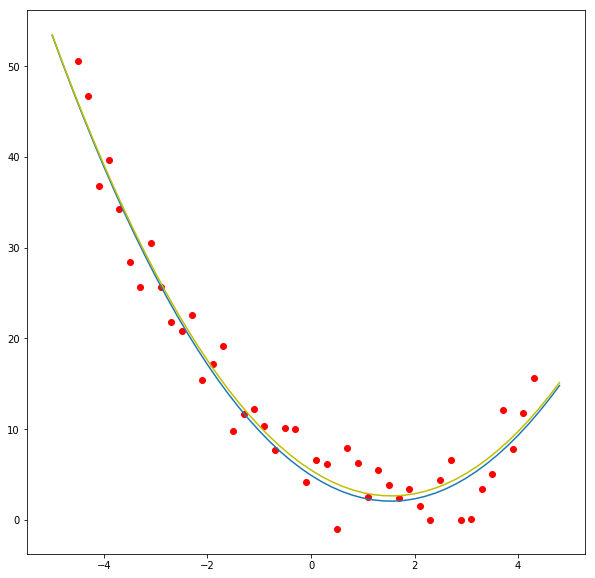

In [15]:
# 我们把基准函数、拟合数据、拟合出来的函数都画出来
pts_x_fit = np.arange(-5.0, 5.0, 0.2).astype(np.float64)
pts_y_fit = [hypo_func(x) for x in pts_x_fit]

plt.figure(figsize=(10,10))
plot(points_x, points_y, 'ro')
plot(pts_x_ground_truth, pts_y_ground_truth)
plot(pts_x_fit, pts_y_fit, 'y')